In [2]:
# Import Dependencies
import os
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
#morgan prukop

## Promotion Dataset

Multiple attributes have been provided around Employee's past and current performance along with demographics.

Features:

- employee_id: Unique ID for employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won?: if awards won during previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

In [4]:
# Read the csv file into a pandas DataFrame called `promotions_df`

promotions = os.path.join('../','Resources', 'promotions.csv')
promotions_df = pd.read_csv(promotions)
promotions_df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48655,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49,0
48656,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
48657,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
48658,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0


In [6]:
# Create `X` and `y` datasets

X = promotions_df.drop('is_promoted', axis=1)
y = promotions_df['is_promoted']

In [20]:
# Dummy encode the `X` data into numerical features
X = pd.get_dummies(X,prefix="Label")

In [21]:
# Divide the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
# Create a StandardScaler() model and fit it to the training data

scaler = StandardScaler().fit(X_train)

In [23]:
# Transform the training and testing data by using the scaler model

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Use Random Forest to predict promotions

In [24]:
# Fit a Random Forest Classifier model with 500 trees and print training and testing scores

clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12165

    accuracy                           1.00     12165
   macro avg       1.00      1.00      1.00     12165
weighted avg       1.00      1.00      1.00     12165

Training Score: 1.0
Testing Score: 1.0


In [25]:
# Calculate feature importance from the fitted random forest model

features = clf.feature_importances_
print(features)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
# Visualize the feature importance 

px.bar(x=X.columns, y=features,labels={"x":"Features","y":"Score Features"})

In [27]:
# Perofrm feature selection using sklearns SelectFromModel module

sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
selFeatures = sel.get_support()
print(X.columns[selFeatures])

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'Label_Analytics', 'Label_Finance',
       'Label_HR', 'Label_Legal', 'Label_Operations', 'Label_Procurement',
       'Label_R&D', 'Label_Sales & Marketing', 'Label_Technology',
       'Label_region_1', 'Label_region_10', 'Label_region_11',
       'Label_region_12', 'Label_region_13', 'Label_region_14',
       'Label_region_15', 'Label_region_16', 'Label_region_17',
       'Label_region_18', 'Label_region_19', 'Label_region_2',
       'Label_region_20', 'Label_region_21', 'Label_region_22',
       'Label_region_23', 'Label_region_24', 'Label_region_25',
       'Label_region_26', 'Label_region_27', 'Label_region_28',
       'Label_region_29', 'Label_region_3', 'Label_region_30',
       'Label_region_31', 'Label_region_32', 'Label_region_33',
       'Label_region_34', 'Label_region_4', 'Label_region_5', 'Label_region_6',
       'Label_region_7', 'Label_region_8', 'Lab

In [28]:
# Use the `.transofrm()` function to transform the scaled `X_train` and `X_test` data 
# to return a new dataframe with only the features from the previous step

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Fit a model and print training and testing scores with 500 trees

clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     12165

    accuracy                           1.00     12165
   macro avg       1.00      1.00      1.00     12165
weighted avg       1.00      1.00      1.00     12165

Training Score: 1.0
Testing Score: 1.0


## Use K Nearest Neighbors to predict promotions

In [48]:
# Fit a K Nearest Neighbors model and loop through different k values of 1 to 20 by 2
# to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.

accuracy = []

for k in range(1,21):
    if k % 2 != 0:
        neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
        Pred_y = neigh.predict(X_test)
        accuracy.append(accuracy_score(y_test, Pred_y))
print(accuracy)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Minimum error:- 0.0 at K = 0


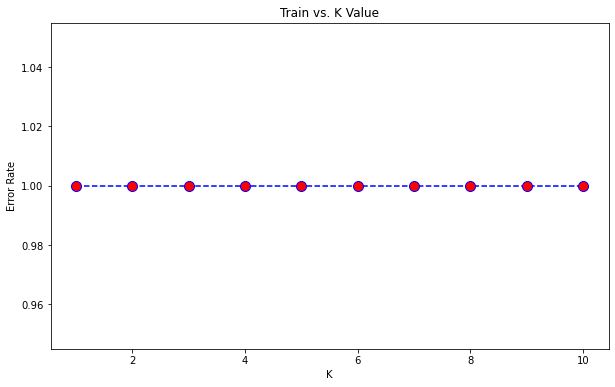

In [50]:
# Plot the results of the train and test scores from the previous loop   

plt.figure(figsize=(10,6))
plt.plot(range(1,11),accuracy,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Train vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [51]:
# Select the `k` that provides the best accuracy where the classifier starts to stablize

neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
accuracy.append(accuracy_score(y_test, Pred_y))